# Simple Linear Regression

This exercise demonstrates simple linear regression with the following key steps:

- **Data Splitting** (Training and Testing Sets)
- **Simple Model Class** (Defining the Regression Model)
- **Training Loop** (Training the Model)
- **Graphing** (Visualizing Before-and-After Training and Losses)


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.5.1+cpu'

## Data Generator

Text(0, 0.5, 'y')

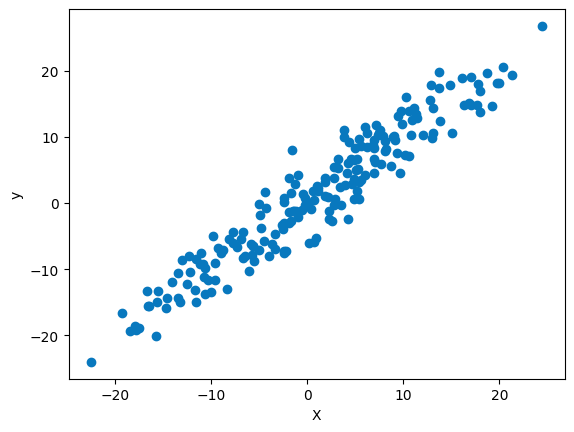

In [3]:
# Data generator with noise
X = torch.randn(200, 1) * 10 
y = X + 3 * torch.randn(200, 1) # we add 3 * torch.rand(100, 1) as a noise

# Plot Color scheme
color1 = (8/255, 120/255, 190/255) # cool blue
color2 = (245/255, 150/255, 35/255) # warm orange
color3 = (34/255, 153/255, 84/255) # fresh green
color4 = (255/255, 182/255, 193/255) # Pastel pink
color5 = (180/255, 180/255, 180/255) # Light Grey

plt.plot(X, y, 'o', c=color1) # Visualize generated data
plt.xlabel('X')
plt.ylabel('y')

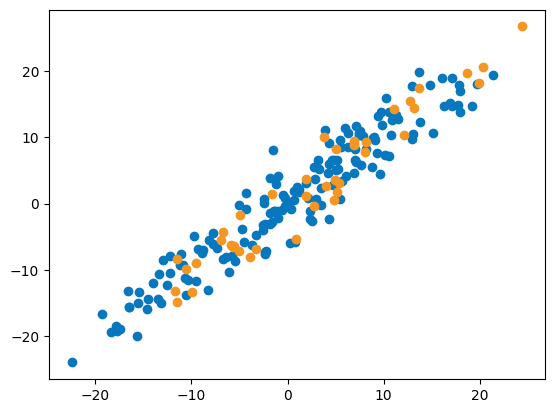

In [4]:
train_split = int(0.8 * len(X)) # We use 80% of dataset for training

x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

# Visualize dataset after splitted
plt.plot(x_train, y_train, 'o', c=color1)
plt.plot(x_test, y_test, 'o', c=color2)

In [5]:
x_train.shape

torch.Size([160, 1])

## Model Architecture

In [6]:
# Simple model blueprint
class LinReg(nn.Module):
    def __init__(self):
        super(LinReg, self).__init__() # We can do super().__init__() version too
        self.linear = nn.Linear(1, 1) # 1 input and 1 output
    def forward(self, x):
        prediction = self.linear(x)
        return prediction


### Model initialization

In [7]:
torch.manual_seed(42)
model = LinReg()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# List named parameters 
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [8]:
# Another method
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [9]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.7645]], requires_grad=True) Parameter containing:
tensor([0.8300], requires_grad=True)


In [10]:
# Get parameters method
def get_params(the_model):
    [w, b] = the_model.parameters()
    weight = w[0][0].item()
    bias = w[0].item()
    return (weight, bias)

In [11]:
print(get_params(model))

(0.7645385265350342, 0.7645385265350342)


In [12]:
def plot_model(chart_title, model):
    w1, b1 = get_params(model)
    x1 = np.array([-30, 30]) # [-30, 30] because in previous plot, the data spread from range -30, 30
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, c=color5, label='Linear regresion') # Plot prediction line
    
    plt.plot(x_train, y_train, 'o', c=color1, label='Training data') # Plot train data
    plt.plot(x_test, y_test, 'o', c=color2, label='Test data') # Plot test data
    plt.legend() # Show legend
    plt.show()

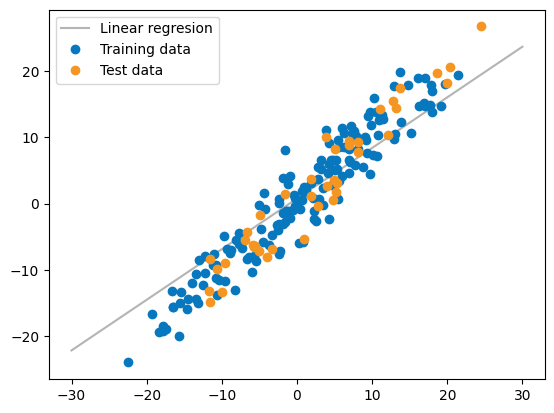

In [13]:
# Plot regression line before training loop
plot_model('Initial model', model)

### Training process

In [14]:
num_epochs = 20
train_losses = [] # To catch the train losses, use tensorboard for large dataset
test_losses = [] 
for i in range(num_epochs):
    # Put model in training mode
    model.train()
    
    # Forward pass
    y_pred = model.forward(x_train)

    # compute loss
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())

    # Zero gradient
    optimizer.zero_grad()

    # compute backward
    loss.backward()

    # Optimizer
    optimizer.step()

    # Set the model in evaluation mode for TESTING
    model.eval()

    with torch.inference_mode():
        y_test_pred = model(x_test)
        test_loss = loss_fn(y_test_pred, y_test)
        test_losses.append(test_loss.item())

    # Print the progress
    # if (i + 1) % 5 == 0:  # Print loss every 5 epochs
    print(f'Epoch [{i + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/20], Loss: 13.7228
Epoch [2/20], Loss: 12.2029
Epoch [3/20], Loss: 11.2127
Epoch [4/20], Loss: 10.5675
Epoch [5/20], Loss: 10.1470
Epoch [6/20], Loss: 9.8728
Epoch [7/20], Loss: 9.6938
Epoch [8/20], Loss: 9.5769
Epoch [9/20], Loss: 9.5004
Epoch [10/20], Loss: 9.4501
Epoch [11/20], Loss: 9.4170
Epoch [12/20], Loss: 9.3951
Epoch [13/20], Loss: 9.3804
Epoch [14/20], Loss: 9.3705
Epoch [15/20], Loss: 9.3636
Epoch [16/20], Loss: 9.3587
Epoch [17/20], Loss: 9.3552
Epoch [18/20], Loss: 9.3525
Epoch [19/20], Loss: 9.3504
Epoch [20/20], Loss: 9.3486


## Results Visualization

### Training vs Losses

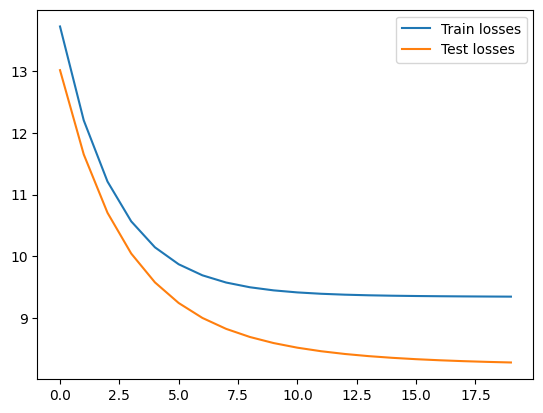

In [15]:
# Plot Train losses vs test losses
plt.plot(range(num_epochs), train_losses, label='Train losses')
plt.plot(range(num_epochs), test_losses, label='Test losses')
plt.legend()

### Post-Training Graph

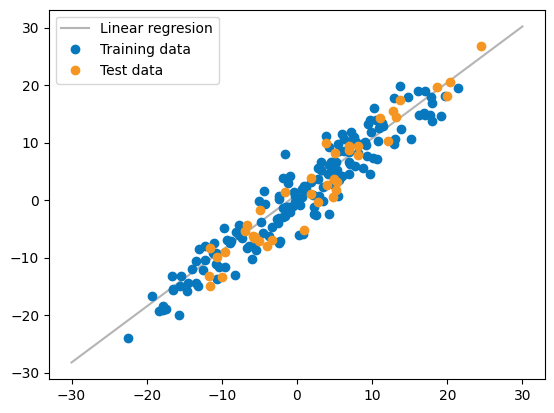

In [16]:
# Plot after training loop
plot_model('Trained model', model)